In [723]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [724]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [725]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1) EDA

#### Explore Our Dataset

In [726]:
train.shape, test.shape

((891, 12), (418, 11))

Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224)

In [727]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [728]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [729]:
# percentage of missing values per column
round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2) 

Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64

In [730]:
round(test.isnull().sum().sort_values(ascending = False)/len(train)*100, 2) 

Cabin          36.70
Age             9.65
Fare            0.11
Embarked        0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
PassengerId     0.00
dtype: float64

### How many people survived the Titanic?

In [731]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [732]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

62% died, 38% survived

-----------------------------------------------------------------------------------------------------

## Feature Engineering

###  Sex vs Survival

In [733]:
train.Sex.value_counts() 

male      577
female    314
Name: Sex, dtype: int64

Males are almost double the Females on the Titanic

In [734]:
# Transform Sex to numeric
train.Sex = train.Sex.map({"male":0,"female":1})
test.Sex = test.Sex.map({"male":0,"female":1})

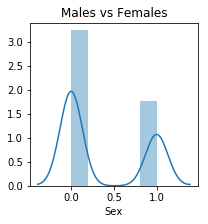

In [735]:
plt.figure(figsize=(3,3))
sns.distplot(train.Sex)
plt.title("Males vs Females");

In [736]:
train.groupby(train["Sex"]).Survived.mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

- 19% of males survived
- 74% of females survived

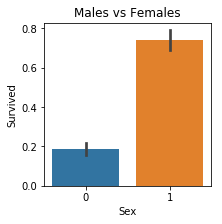

In [737]:
plt.figure(figsize=(3,3))
sns.barplot('Sex','Survived',data=train)
plt.title("Males vs Females");

###  Age vs Survival

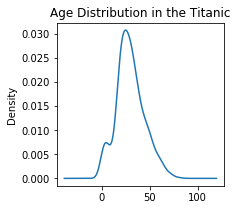

In [738]:
plt.figure(figsize=(3,3))
train.Age.plot(kind='kde',title='Age Distribution in the Titanic');

In [739]:
train.Age.mean()

29.69911764705882

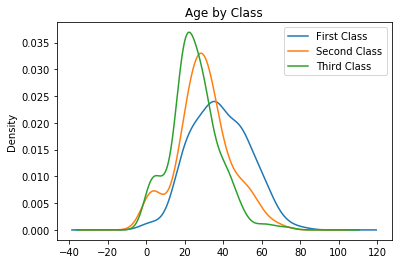

In [740]:
for i in [1,2,3]:
    train.Age[train.Pclass==i].plot(kind='kde')
    
plt.title('Age by Class')
plt.legend(('First Class','Second Class','Third Class'));

As expected, the higher the class the older the passengers

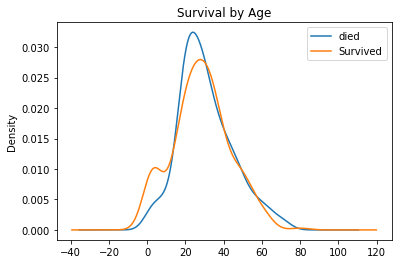

In [741]:
train.Age[train.Survived==0].plot(kind='kde')
train.Age[train.Survived==1].plot(kind='kde')
plt.title('Survival by Age')
plt.legend(('died','Survived'));

The graph shows that children are more likely to survive as they were given priority  

In [742]:
train[train.Age <=12 ].Survived.mean()

0.5797101449275363

In [743]:
train[train.Age <=12 ].Pclass.mean()

2.63768115942029

In [744]:
train[train.Age <=6 ].Survived.mean()

0.7021276595744681

In [745]:
train[train.Age <=6 ].Pclass.mean()

2.574468085106383

In [746]:
train[train.Age >= 60 ].Survived.mean()

0.2692307692307692

According to the analysis above, children have a higher chance of survival, despite their Pclass.

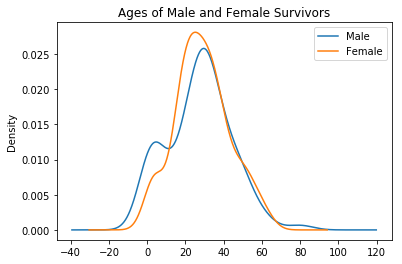

In [747]:
train.Age[(train.Survived==1) & (train.Sex==0)].plot(kind='kde')
train.Age[(train.Survived==1) & (train.Sex==1)].plot(kind='kde')
plt.title('Ages of Male and Female Survivors')
plt.legend(('Male','Female'));

-------------------------------------------------------------------------------------------------


### Pclass 

In [748]:
train.groupby(train.Pclass).Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


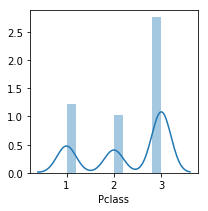

In [749]:
plt.figure(figsize=(3,3))
sns.distplot(train.Pclass);

### Pclass vs Survival

In [750]:
train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [751]:
# here we check the distribution of males and females per class 
# because Sex is a strong indicator of Survival
# we need to check the proportions of males and females per class 
train.groupby('Pclass').Sex.mean()

Pclass
1    0.435185
2    0.413043
3    0.293279
Name: Sex, dtype: float64

The analysis above indicates that there are more females in the first and second class. The third class contains only 30% females.

#### probability of survival of females across classes

In [752]:
train.Survived[(train.Sex == 1) & (train.Pclass == 1)].mean(), train.Survived[(train.Sex == 1) & (train.Pclass == 2)].mean(), train.Survived[(train.Sex == 1) & (train.Pclass == 3)].mean()

(0.9680851063829787, 0.9210526315789473, 0.5)

#### probability of survival of males across classes

In [753]:
train.Survived[(train.Sex == 0) & (train.Pclass == 1)].mean(), train.Survived[(train.Sex == 0) & (train.Pclass == 2)].mean(), train.Survived[(train.Sex == 0) & (train.Pclass == 3)].mean()

(0.36885245901639346, 0.1574074074074074, 0.13544668587896252)

Our analysis indicates that there are two strong indicators of survival: Pclass and Sex.
The third class contains a large proportion of males compared to females. 
The Titanic actually has more males in general (as mentioned in the beginning). 

---------------------------------------------------------------------------------------------------

### Names and Titles

- We can see that Pclass and Gender are strong indicators of survival. 
- Lets see if the title is also correlated with survival


In [754]:
titles = [i.split(",")[1].split(".")[0].strip() for i in train.Name]
train['Title'] = pd.Series(titles)
titles = [i.split(",")[1].split(".")[0].strip() for i in test.Name]
test['Title'] = pd.Series(titles)

In [755]:
pd.crosstab(train['Title'], train['Sex']).transpose()

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
0,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0
1,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1


Note that only Dr is a title for both male and female

--------------------------------------------------------------------------------------------------

In [756]:
# Survival Rate per Title
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,0,0.5,0,0.428571,0,1,0.5,0.575,0.697802,1,1,0.156673,0.792,1,0,1,1


The titles Master and Miss have a higher survival rate because they represent children which already have a higher survival rate due to age only.

In [757]:
# Pclass per title
train[['Title', 'Pclass']].groupby(['Title'], as_index=False).mean().transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Pclass,1,1,1,1.28571,1,1,1,2.625,2.30769,1,1,2.41006,2,2,2,1,1


In [758]:
# Age per title
train[['Title', 'Age']].groupby(['Title'], as_index=False).mean().transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Age,70,58,40,42,38,48,48.5,4.57417,21.774,24,24,32.3681,35.8981,28,43.1667,49,33


There are 40 passengers with the title "master" and their mean age group is 4.5 years old

------------------------------------------------------------------------------------------------------

After doing some research, I found that some of these titles (especially the rare ones) are either royalty or honorary titles. They (the rare titles) also have a Pclass of 1, except "Rev","Ms" and two doctors which belong to Pclass 2. 

In [759]:
newtitles={
    "Capt":       "rare",
    "Col":        "rare",
    "Major":      "rare",
    "Jonkheer":   "rare",
    "Don":        "rare",
    "Sir" :       "rare",
    "Dr":         "rare",
    "Rev":        "rare",
    "the Countess":"rare",
    "Dona":       "rare",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Miss",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "rare"}

In [760]:
train["Title"] = train.Title.map(newtitles)
test["Title"] = test.Title.map(newtitles)

In [761]:
train.groupby(train["Title"]).Survived.mean()

Title
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.793651
rare      0.347826
Name: Survived, dtype: float64

In [762]:
train.pivot_table(values='Survived',index='Title',columns='Sex')

Sex,0,1
Title,,
Master,0.575000,NaN
Miss,NaN,0.702703
Mr,0.156673,NaN
Mrs,NaN,0.793651
rare,0.250000,1.000000


passengers with rare titles have a higher chance of survival than other passengers. All rare females survived. 25% of rare males survived.

In [763]:
train.groupby(train["Title"]).Sex.mean()

Title
Master    0.000000
Miss      1.000000
Mr        0.000000
Mrs       1.000000
rare      0.130435
Name: Sex, dtype: float64

only 13% of rare titles are female

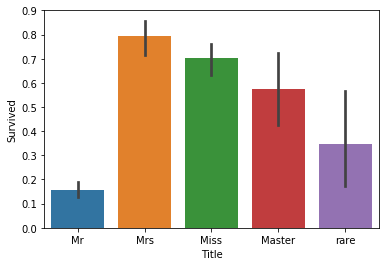

In [764]:
sns.barplot(x='Title',y='Survived',data=train);

In [765]:
train.drop(labels=['Name'],axis=1,inplace=True)
test.drop(labels=['Name'],axis=1,inplace=True)

### Sibsp & Parch vs Survival

In [766]:
# num of siblings / spouses aboard the Titanic
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

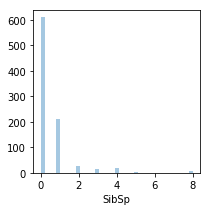

In [767]:
plt.figure(figsize=(3,3))
sns.distplot(train.SibSp,kde=False);

In [768]:
# num of parents / children aboard the Titanic
train.Parch.value_counts(ascending=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

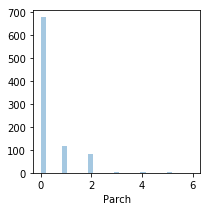

In [769]:
plt.figure(figsize=(3,3))
sns.distplot(train.Parch,kde=False);

In [770]:
train['fam_size'] = train.SibSp + train.Parch + 1
test['fam_size'] = test.SibSp + test.Parch + 1

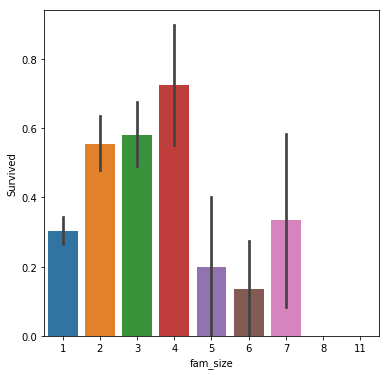

In [771]:
plt.figure(figsize=(6,6))
g = sns.barplot(x="fam_size",y="Survived",data=train);

In [772]:
train.groupby('fam_size').Survived.mean()

fam_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

It seems that smaller sized families have a larger chance of survival than singles and large families (more than 4)

In [773]:
train['Single'] = train.fam_size.map(lambda x:1 if x==1 else 0)
train['med_family'] = train.fam_size.map(lambda x:1 if (x>1) & (x<5) else 0)
train['lrg_family'] = train.fam_size.map(lambda x:1 if (x>=5) else 0)
train.drop(labels=['fam_size'],axis=1,inplace=True)


test['Single'] = test.fam_size.map(lambda x:1 if x==1 else 0)
test['med_family'] = test.fam_size.map(lambda x:1 if (x>1) & (x<5) else 0)
test['lrg_family'] = test.fam_size.map(lambda x:1 if (x>=5) else 0)
test.drop(labels=['fam_size'],axis=1,inplace=True)

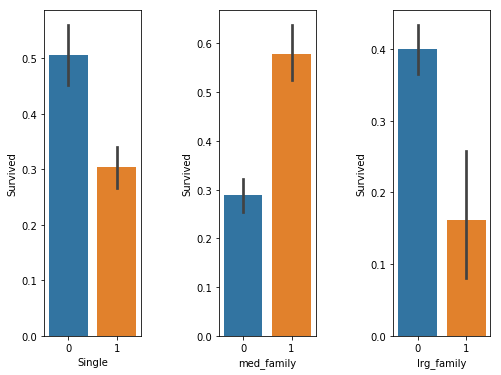

In [774]:
plt.figure(figsize=[8,6])
plt.subplot(1,3,1)
sns.barplot("Single",y="Survived",data=train)
plt.subplot(1,3,2)
sns.barplot("med_family",y="Survived",data=train)
plt.subplot(1,3,3)
sns.barplot("lrg_family",y="Survived",data=train)
plt.subplots_adjust(wspace=0.8);

In [775]:
train.drop(labels=['SibSp','Parch'],axis=1,inplace=True)
test.drop(labels=['SibSp','Parch'],axis=1,inplace=True)

#### 3- Embarked

In [776]:
train.Embarked.value_counts()  # most frequent value is S

S    644
C    168
Q     77
Name: Embarked, dtype: int64

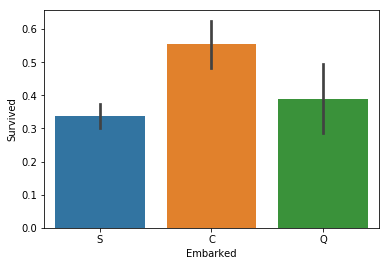

In [777]:
sns.barplot(x='Embarked',y='Survived',data=train);

The highest survival rate is for the port C. It could be that most first class passengers took off from port C

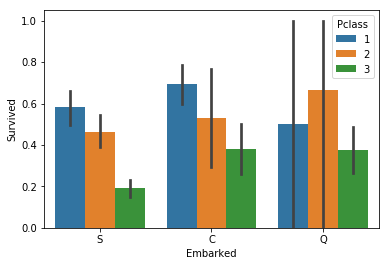

In [778]:
sns.barplot(x='Embarked',y='Survived',hue='Pclass',data=train);

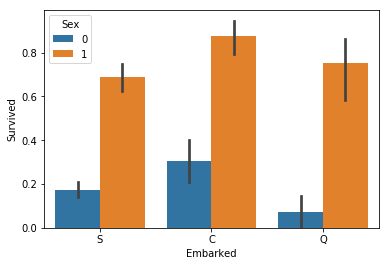

In [779]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=train);

## Fare

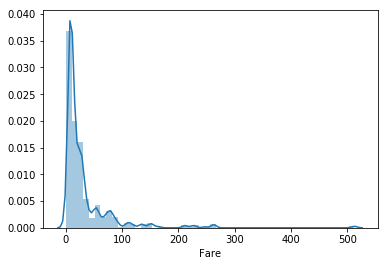

In [780]:
sns.distplot(train.Fare);

Fare looks very skewed. We will apply the log function to reduce the skewness of the Fare distribution

In [781]:
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
test["Fare"] = test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

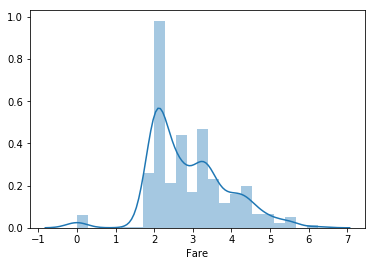

In [782]:
sns.distplot(train.Fare);

## Fill Missing Values

#### Embarked- Missing Values

In [783]:
train.Embarked.fillna('S',inplace=True) # fill with the most frequent value
test.Embarked.fillna('S',inplace=True)

#### Age- Missing Values

In [784]:
mean_age = (train.Age.mean() + test.Age.mean()) / 2

In [785]:
train.Age.fillna(mean_age,inplace=True)
test.Age.fillna(mean_age,inplace=True)

#### Fill missing values by title mean .. didnt work!!

In [786]:
# mean_miss_age = train[train['Title']=='Miss'].Age.mean()
# mean_mrs_age = train[train['Title']=='Mrs'].Age.mean()

# mean_master_age = train[train['Title']=='Master'].Age.mean()
# mean_mr_age = train[train['Title']=='Mr'].Age.mean()

# mean_rare_age = train[train['Title']=='rare'].Age.mean()

In [787]:
# mean_miss_age, mean_mrs_age, mean_master_age, mean_mr_age, mean_rare_age

In [788]:
# train.loc[train['Title']=='Miss'].Age.fillna(mean_miss_age,inplace=True)
# train[train['Title']=='Mrs'].Age.fillna(mean_mrs_age,inplace=True)

# train[train['Title']=='Master'].Age.fillna(mean_master_age,inplace=True)
# train[train['Title']=='Mr'].Age.fillna(mean_mr_age,inplace=True)

# train[train['Title']=='rare'].Age.fillna(mean_rare_age,inplace=True)

In [789]:
# test[test['Title']=='Miss'].Age.fillna(mean_miss_age,inplace=True)
# test[test['Title']=='Mrs'].Age.fillna(mean_mrs_age,inplace=True)

# test[test['Title']=='Master'].Age.fillna(mean_master_age,inplace=True)
# test[test['Title']=='Mr'].Age.fillna(mean_mr_age,inplace=True)

# test[test['Title']=='rare'].Age.fillna(mean_rare_age,inplace=True)

#### Fare- Missing Values

In [790]:
train.Fare.mean(),test.Fare.mean()

(2.893846237920027, 2.9393195814959876)

In [791]:
test.Fare.fillna(test.Fare.mean(),inplace=True)

## Drop Unwanted Columns

In [792]:
train.drop(labels=['PassengerId','Ticket','Cabin'],axis=1,inplace=True)
test.drop(labels=['PassengerId','Ticket','Cabin'],axis=1,inplace=True)

## Correlations

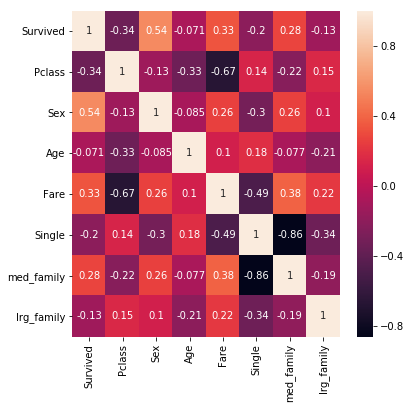

In [794]:
plt.figure(figsize=[6,6])
sns.heatmap(train.corr(),annot=True);

We can see from the heatmap the following observations: 
- females have a higher correlation with survival
- Pclass has a negative correlation with survival (higher Pclass values correlate negatively with survival) 
- medium sized families have a higher correlation with survival
- higher fares have a higher correlation with survival. However they also have a high correlation with PClass. Therefore we will drop the Fare column and keep Pclass only to avoid multicollinearity.

## DataTypes

In [695]:
# train = pd.get_dummies(train, columns=['Pclass','Embarked','Title'])
# test = pd.get_dummies(test, columns=['Pclass','Embarked','Title'])

In [698]:
y = train.pop('Survived')
X = train

In [699]:
test.shape, train.shape, X.shape, y.shape

((418, 17), (891, 17), (891, 17), (891,))

### Our data is now complete, in the right format, and ready for modeling

## Logistic regression

In [700]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X,y)
y_hat = lr.predict(test)
round(lr.score(X,y)*100,2)

83.16

In [711]:
X.columns.values

array(['Sex', 'Age', 'Fare', 'Single', 'med_family', 'lrg_family',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_rare'], dtype=object)

In [712]:
lr.coef_[0]

array([ 1.35572224, -0.02542153,  0.28354523,  0.90102027,  0.53116295,
       -1.83273665,  0.76162863, -0.15611902, -1.00606303, -0.03170442,
        0.0060592 , -0.37490821,  1.43580812,  0.02021303, -1.44196022,
        0.61723769, -1.03185205])

In [713]:
pd.DataFrame({"feature":X.columns.values, "coefficient":lr.coef_[0]}) 

,feature,coefficient
0,Sex,1.355722
1,Age,-0.025422
2,Fare,0.283545
3,Single,0.901020
4,med_family,0.531163
5,lrg_family,-1.832737
6,Pclass_1,0.761629
7,Pclass_2,-0.156119
8,Pclass_3,-1.006063
9,Embarked_C,-0.031704


## SVC

In [715]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X,y)
y_hat = svc.predict(test)
round(svc.score(X,y)*100,2)

85.19

## Linear SVC

In [718]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X,y)
y_hat = lsvc.predict(test)
round(lsvc.score(X,y)*100,2)

82.83

## KNN

In [716]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X,y)
y_hat = knn.predict(test)
round(knn.score(X,y)*100,2)

85.63

## Decision Tree

In [719]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X,y)
y_hat = dt.predict(test)
round(dt.score(X,y)*100,2)

98.43

## Random Forest

In [721]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X,y)
y_hat = rf.predict(test)
round(rf.score(X,y)*100,2)

98.43

## Naive Bayes

In [717]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X,y)
y_hat = nb.predict(test)
round(nb.score(X,y)*100,2)

81.93